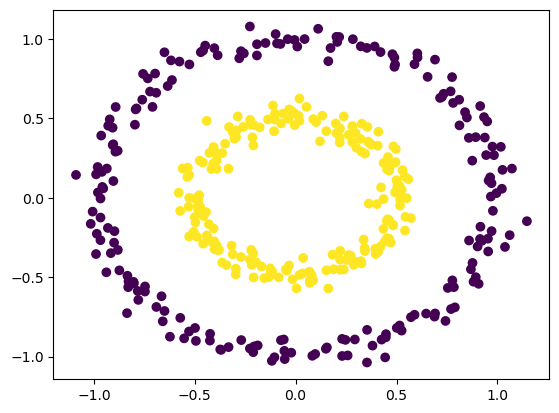

In [78]:
import numpy as np
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)

In [79]:
from sklearn.cluster import KMeans, BisectingKMeans, AgglomerativeClustering

from sklearn.metrics import silhouette_score, silhouette_samples

pred_kmeans = KMeans(n_clusters=2).fit_predict(X)

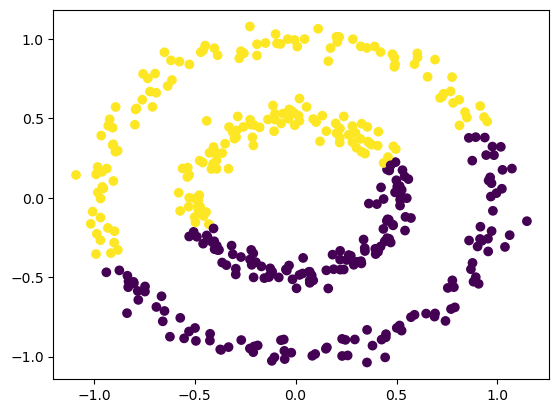

In [80]:
plt.scatter(X[:, 0], X[:, 1], c=pred_kmeans)

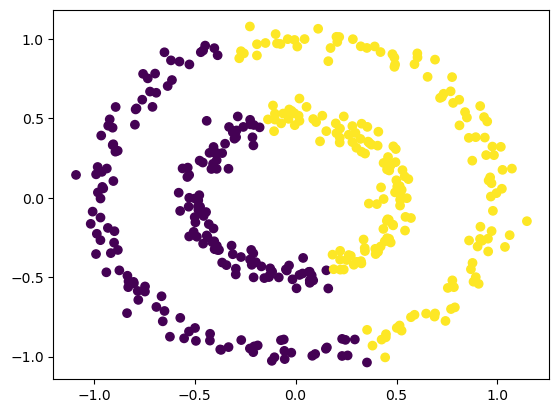

In [81]:
pred_bisect = BisectingKMeans(n_clusters=2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred_bisect)

In [82]:
pred_agg_single = AgglomerativeClustering(n_clusters=2, linkage="single").fit_predict(X)
pred_agg_avg = AgglomerativeClustering(n_clusters=2, linkage="average").fit_predict(X)
pred_agg_complete = AgglomerativeClustering(n_clusters=2, linkage="complete").fit_predict(X)
pred_agg_default = AgglomerativeClustering(n_clusters=2).fit_predict(X)

<Figure size 1200x800 with 0 Axes>

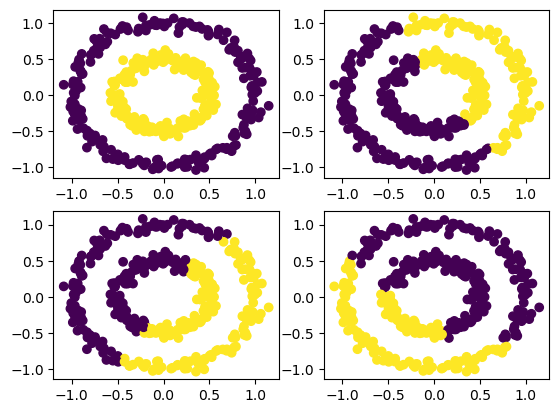

In [83]:
plt.figure(figsize=(12, 8))

fig, ax = plt.subplots(2, 2)
ax[0, 0].scatter(X[:, 0], X[:, 1], c=pred_agg_single)
ax[0, 1].scatter(X[:, 0], X[:, 1], c=pred_agg_avg)
ax[1, 0].scatter(X[:, 0], X[:, 1], c=pred_agg_complete)
ax[1, 1].scatter(X[:, 0], X[:, 1], c=pred_agg_default)

plt.show()

# Warum kommt nur Single-Linkage in Frage?
# Algorithmus Agglomeratives Clustering: Starte mit einzel-Clustern und kombiniere iterativ die beiden cluster mit der niedrigsten Distanz
# => Single Linkage ist am lokalsten...


| Kohäsion                                                | Seperation                                                             |
| ------------------------------------------------------- | ---------------------------------------------------------------------- |
| Ähnlichkeit zu Punkten<br>im selben Cluster             | Unähnlichkeit zu Punkten<br>in fremden Clustern                        |
| $a(x_i) = \frac{1}{\# C_j-1} \sum_{x \in C_j} d(x,x_i)$ | $b(x_i) = \min_{k \neq j} \frac{1}{\# C_k} \sum_{x \in C_k} d(x_i, x)$ |


Der Silhuettenindex (groß ist gut) ist
$$s(x_i) = \frac{b(x_i)-a(x_i)}{\max \{a(x_i), b(x_i)\}} \in [-1, 1]$$
Mittlerer Silhuettenindex

| Für Cluster $C_j$                                  | Insgesamt                                 |
| -------------------------------------------------- | ----------------------------------------- |
| $\bar s_j = \frac{1}{\# C_j} \sum_{x \in C_j}s(x)$ | $\bar s = \frac{1}{n} \sum_{i=1}^n s(x_i$ |


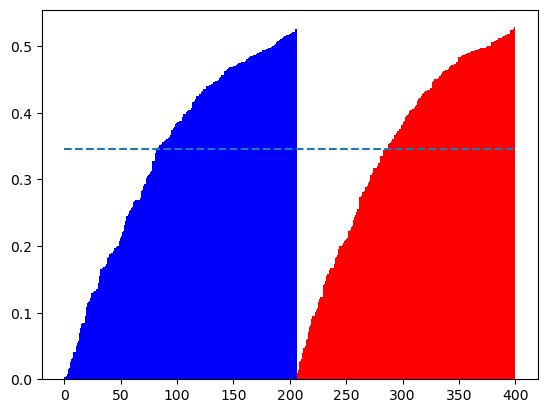

In [84]:
import numpy as np

def draw_silhuette_plot(X, y):
    sis = silhouette_samples(X, y)
    avg_sis = np.mean(sis)
    scores = []
    colors = []
    base_colors = ['b', 'r', 'c', 'g', 'm', 'y']
    N = len(y)
    for label in list(set(y)):
        idx = y == label
        sis_for_label = sorted(sis[idx])
        n = len(sis_for_label)
        scores += sis_for_label
        colors += [base_colors[label]] * n

    x = np.arange(N)
    plt.plot([avg_sis] * N, linestyle='dashed')
    plt.bar(x, scores, align="edge", width=1, color=colors)
    plt.show()

draw_silhuette_plot(X, pred_kmeans)

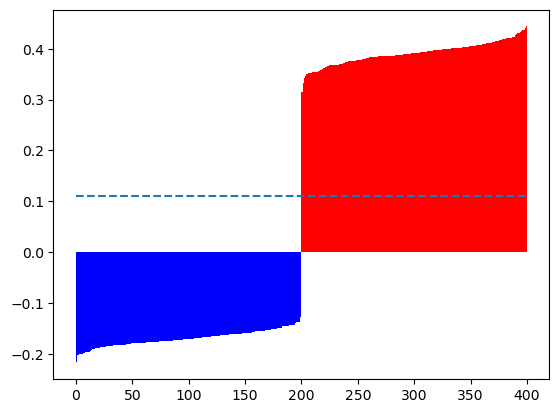

In [85]:
draw_silhuette_plot(X, pred_agg_single)

Gegeben sind $C_1, \dots C_k$ Cluster, $T_1, \dots, T_k$ wahre Cluster (ground truth).
Sei $n_i := \# C_j$
##### purity
$$
\begin{aligned}
\text{purity}_i &= \frac{1}{n_i} \max_{j=1, \dots k} \# C_i \cap T_j \quad \in[0,1] \\
\text{purity} &= \sum_{i=1}^k \frac{n_i}{n} \text{purity}_i  \quad \in[0,1]
\end{aligned}
$$

In [86]:
import pandas as pd

def get_clusters(y):
    labels = list(set(y))
    sets = []
    for label in labels:
        truth_values = pd.Series(y == label)
        idx = truth_values[truth_values].index
        sets += [set(idx)]
    return sets

def purity(y_pred, y_true):
    N = len(y_pred)
    assert len(y_true) == N

    C = get_clusters(y_pred)
    T = get_clusters(y_true)

    n = len(C)
    purity = 0
    for i in range(0, n):
        purity += max([len(C[i] & t) for t in T])
    purity /= N
    return purity

print(purity(pred_agg_single, y))
print(purity(pred_kmeans, y)) # 0.5

1.0
0.505


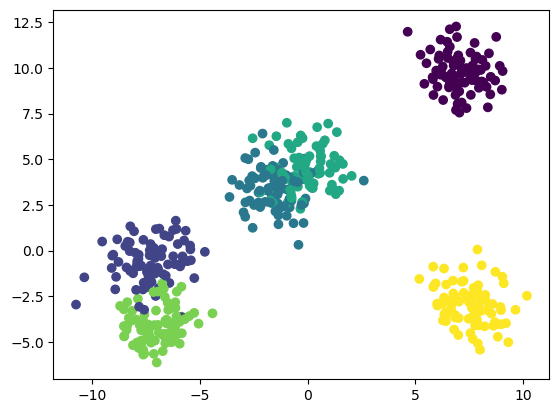

In [87]:
from sklearn.datasets import make_blobs

blobs, blob_labels = make_blobs(n_samples=500, centers=6)

plt.scatter(blobs[:, 0], blobs[:, 1], c=blob_labels)

In [88]:
pred_kmeans = KMeans(n_clusters=6).fit_predict(blobs)
pred_bisect = BisectingKMeans(n_clusters=6).fit_predict(blobs)
pred_agg_single = AgglomerativeClustering(n_clusters=6, linkage="single").fit_predict(blobs)
pred_agg_avg = AgglomerativeClustering(n_clusters=6, linkage="average").fit_predict(blobs)
pred_agg_complete = AgglomerativeClustering(n_clusters=6, linkage="complete").fit_predict(blobs)
pred_agg_default = AgglomerativeClustering(n_clusters=6).fit_predict(blobs)

<Figure size 1200x800 with 0 Axes>

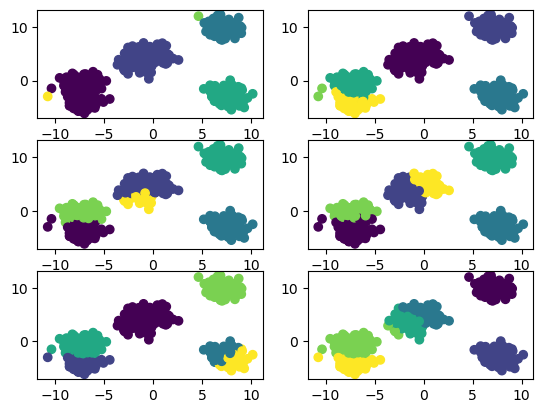

In [89]:
plt.figure(figsize=(12, 8))

fig, ax = plt.subplots(3, 2)
ax[0, 0].scatter(blobs[:, 0], blobs[:, 1], c=pred_agg_single)
ax[0, 1].scatter(blobs[:, 0], blobs[:, 1], c=pred_agg_avg)
ax[1, 0].scatter(blobs[:, 0], blobs[:, 1], c=pred_agg_complete)
ax[1, 1].scatter(blobs[:, 0], blobs[:, 1], c=pred_agg_default)
ax[2, 0].scatter(blobs[:, 0], blobs[:, 1], c=pred_kmeans)
ax[2, 1].scatter(blobs[:, 0], blobs[:, 1], c=pred_bisect)
plt.show()

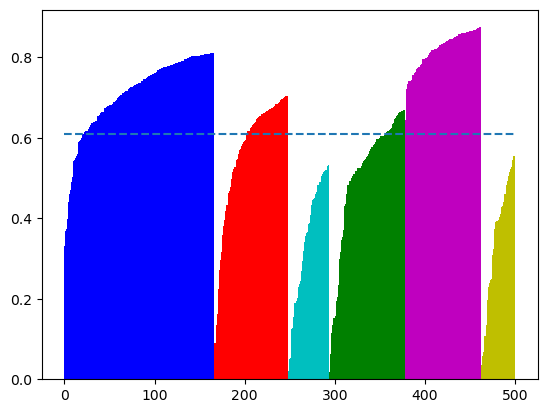

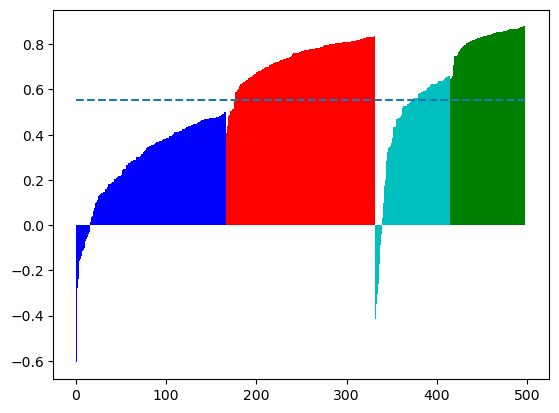

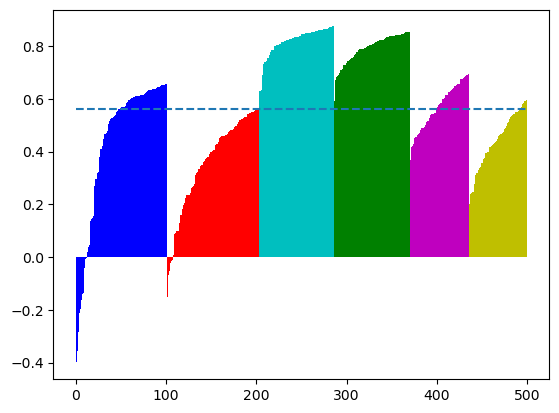

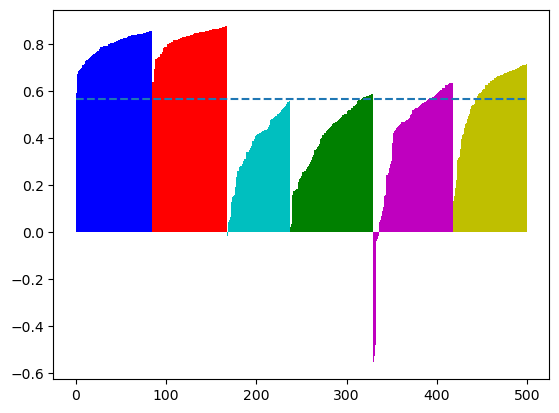

In [91]:
draw_silhuette_plot(blobs, pred_kmeans)
draw_silhuette_plot(blobs, pred_agg_single)
draw_silhuette_plot(blobs, pred_agg_default)
draw_silhuette_plot(blobs, pred_bisect)

# Man erkennt das Standard-KMeans am besten ist auch am Silhouette Plot (es waren ja auch Blobs)

In [97]:
print(purity(pred_kmeans, blob_labels))
print(purity(pred_agg_single, blob_labels))
print(purity(pred_agg_default, blob_labels))
print(purity(pred_bisect, blob_labels))

0.812
0.668
0.898
0.904
